# Bellman–Ford

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

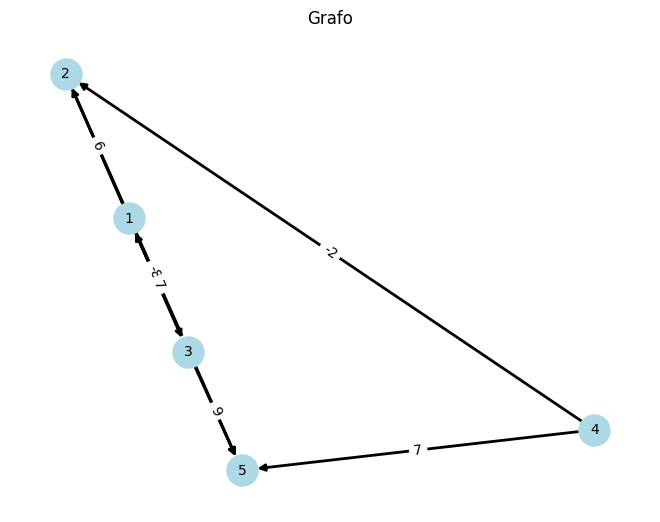

In [13]:
# Grafo orientado com pesos
G = nx.DiGraph()

# Adicionando nós
G.add_nodes_from([1, 2, 3, 4,5])

# Adicionando arestas com pesos
G.add_weighted_edges_from([
    (1, 2,6), (1,5,2),
    (2,3,8),(2,5,-8),
    (3,1,7),(3,5,9),
    (4,2,-2),(4,5,7)
])

# Desenhando o grafo
pos = nx.spring_layout(G)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', width=2, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo")
plt.show()


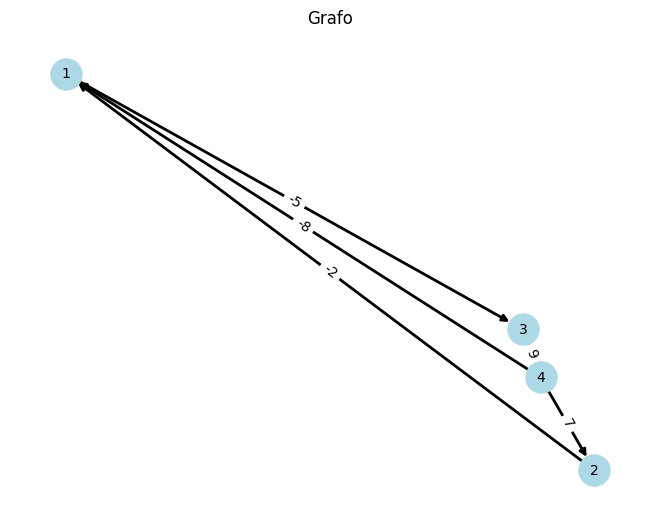

In [33]:
# Grafo orientado com pesos
G = nx.DiGraph()

# Adicionando nós
G.add_nodes_from([1, 2, 3, 4])

# Adicionando arestas com pesos
G.add_weighted_edges_from([
    (1, 3,-5),
    (2,1,-2),
    (3,4,9),
    (4,1,-8),(4,2,7)
])

# Desenhando o grafo
pos = nx.spring_layout(G)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', width=2, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo")
plt.show()

## codigos


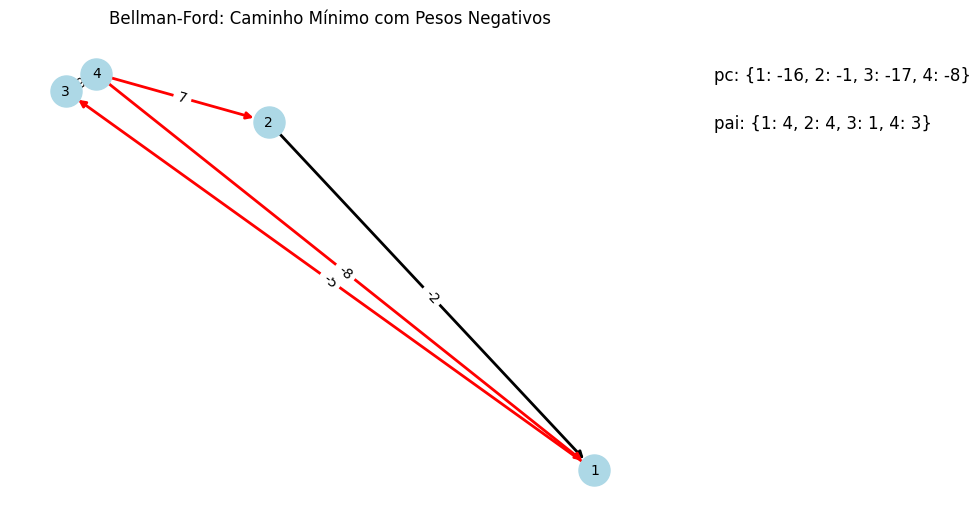

In [34]:
def bellmanFord(G, vo):
    # Inicialização
    pc = {v: float('inf') for v in G.nodes()}
    pai = {v: None for v in G.nodes()}
    pc[vo] = 0
    
    # Iterações
    for it in range(len(G.nodes())):
        atualizacao = False
        for v in G.nodes():
            for vadj in G.successors(v):
                if pc[vadj] > pc[v] + G[v][vadj]['weight']:
                    pc[vadj] = pc[v] + G[v][vadj]['weight']
                    pai[vadj] = v
                    atualizacao = True
        if not atualizacao:
            break
    
    return pc, pai

def plot_bellmanFord(G, vo):
    # Obtendo resultados do Algoritmo
    pc, pai = bellmanFord(G, vo)
    
    # Lista de arestas no caminho mínimo
    caminho_minimo = []
    for v in pai:
        if pai[v] is not None:
            caminho_minimo.append((pai[v], v))
    
    # Desenhando o grafo
    pos = nx.spring_layout(G)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    
    # Arestas do caminho mínimo em vermelho, outras em preto
    edge_colors = ['red' if e in caminho_minimo else 'black' for e in G.edges()]
    
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', width=2, edge_color=edge_colors, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    # Adicionando legenda para pc e pai
    plt.text(1.1, 0.9, f"pc: {pc}", transform=plt.gca().transAxes, fontsize=12)
    plt.text(1.1, 0.8, f"pai: {pai}", transform=plt.gca().transAxes, fontsize=12)
    
    plt.title("Bellman-Ford: Caminho Mínimo com Pesos Negativos")
    plt.show()

# Executando e plotando o Algoritmo de Bellman-Ford para o vértice 3
plot_bellmanFord(G, vo=1)


# interação

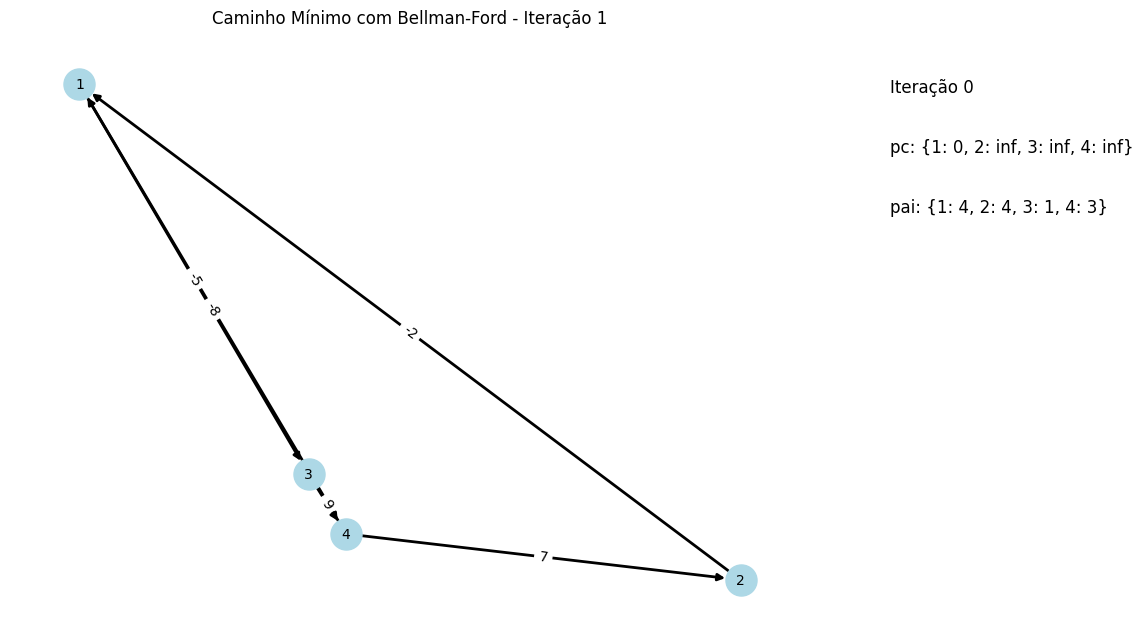

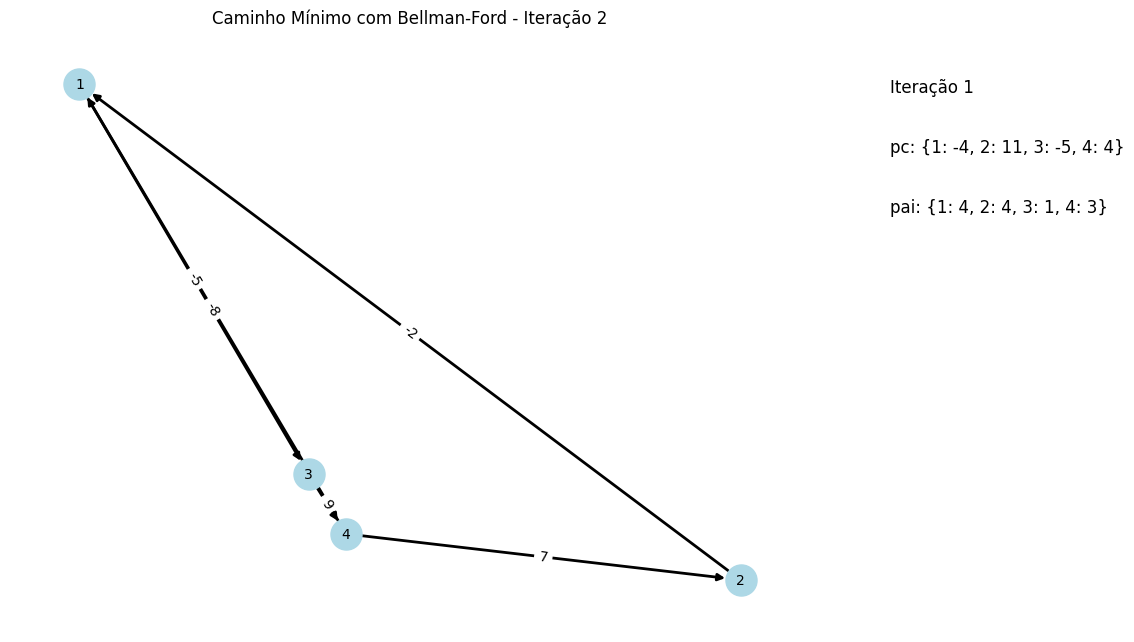

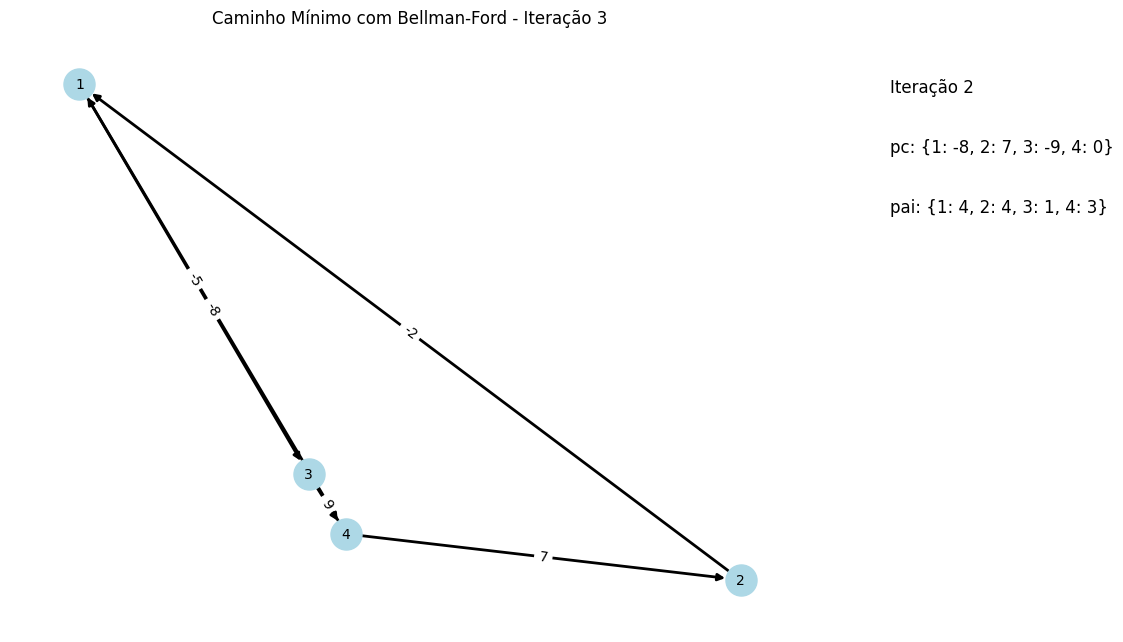

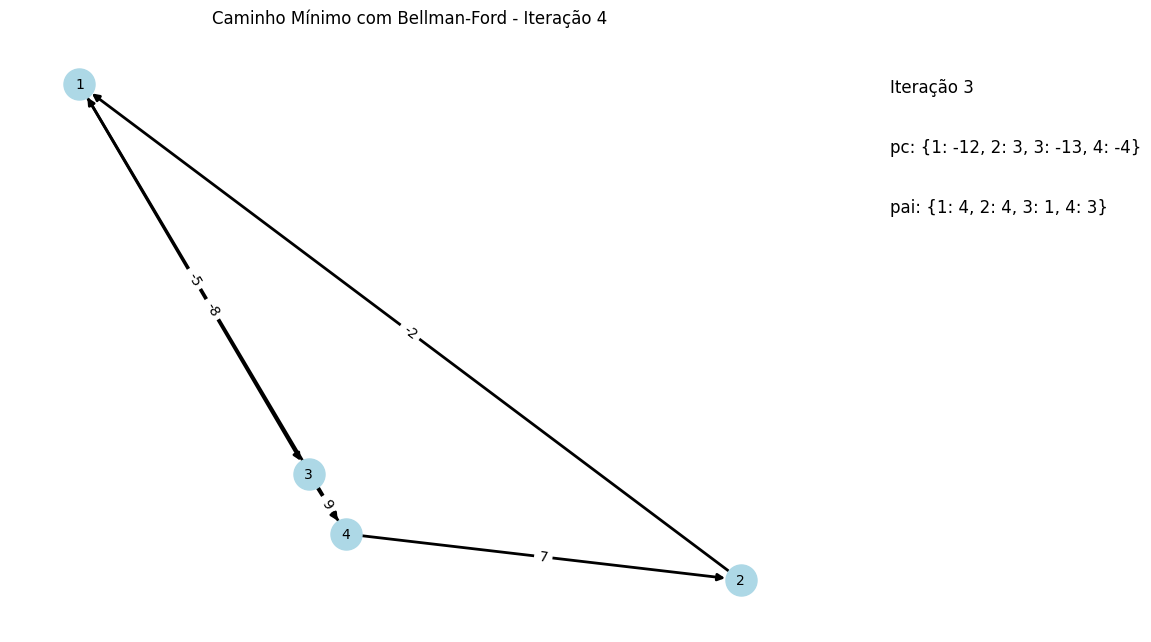

In [35]:
def bellmanFord(G, vo):
    pc = {v: float('inf') for v in G.nodes()}
    pai = {v: None for v in G.nodes()}
    pc[vo] = 0
    caminhos = []
    
    for it in range(len(G.nodes())):
        atualizacao = False
        caminhos.append(dict(pc))
        
        for v_pai in G.nodes():
            for v_adj in G.successors(v_pai):
                if pc[v_adj] > pc[v_pai] + G[v_pai][v_adj]['weight']:
                    pc[v_adj] = pc[v_pai] + G[v_pai][v_adj]['weight']
                    pai[v_adj] = v_pai
                    atualizacao = True
        
        if not atualizacao:
            break
    
    return caminhos, pai

def plot_bellmanFord(G, vo):
    caminhos, pai = bellmanFord(G, vo)
    pos = nx.spring_layout(G)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    
    for idx, c in enumerate(caminhos):
        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', width=2, arrows=True)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.text(1.1, 0.9, f"Iteração {idx}", transform=plt.gca().transAxes, fontsize=12)
        plt.text(1.1, 0.8, f"pc: {c}", transform=plt.gca().transAxes, fontsize=12)
        plt.text(1.1, 0.7, f"pai: {pai}", transform=plt.gca().transAxes, fontsize=12)
        plt.title("Caminho Mínimo com Bellman-Ford - Iteração " + str(idx+1))
        plt.show()

# Executando e plotando o Algoritmo de Bellman-Ford para o vértice 1
plot_bellmanFord(G, vo=1)
